# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.199082e+01     1.456994e+01
 * time: 0.0033130645751953125
     1     6.217634e+01     1.128642e+01
 * time: 0.009476900100708008
     2     5.591542e+01     1.445709e+01
 * time: 0.023494958877563477
     3     4.014941e+01     9.456727e+00
 * time: 0.041626930236816406
     4     2.952677e+01     7.286778e+00
 * time: 0.05961489677429199
     5     2.325163e+01     6.026025e+00
 * time: 0.0753319263458252
     6     1.136485e+01     1.971583e+00
 * time: 0.1513528823852539
     7     9.060192e+00     2.443889e+00
 * time: 0.16484999656677246
     8     7.457506e+00     2.005018e+00
 * time: 0.17806506156921387
     9     7.029544e+00     1.482789e+00
 * time: 0.19101500511169434
    10     6.768418e+00     2.467136e+00
 * time: 0.20155096054077148
    11     6.714953e+00     2.715935e+00
 * time: 0.2122020721435547
    12     6.484283e+00     1.403950e+00
 * time: 0.2225170135498047
    13     6.224567e+00     1.125276e+00
 * time

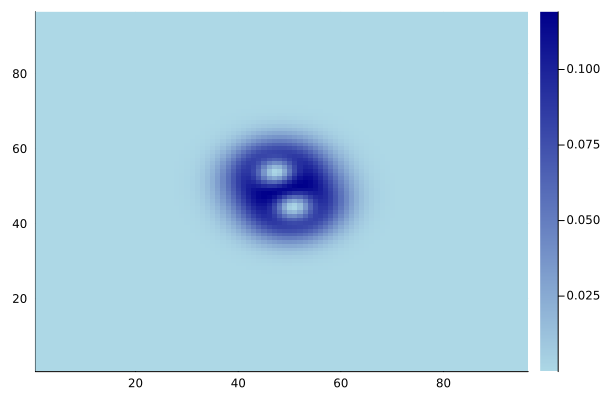

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)